**Importation des libs**

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Collecte de données sur yahoo finance
data = yf.download('BTC-USD', start='2020-01-01', end='2024-08-22', interval='1d')


[*********************100%***********************]  1 of 1 completed


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [5]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
# Avantage de laisser la date
filtered_df = data.loc['2020-01-01':'2024-01-01']


In [7]:
filtered_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [8]:
missing_data = data.isnull().sum()

In [9]:
missing_data

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1695.000000,1695.000000,1695.000000,1695.000000,1695.000000,1.695000e+03
mean,33158.695414,33896.990189,32372.298962,33188.169594,33188.169594,3.205727e+10
std,17999.919473,18419.608196,17522.780688,17999.242762,17999.242762,1.823068e+10
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,19164.673828,19422.261719,18762.067383,19179.062500,19179.062500,2.030846e+10
50%,29892.740234,30425.861328,29357.587891,29908.744141,29908.744141,2.910147e+10
75%,46206.634766,47287.712891,44536.906250,46241.894531,46241.894531,3.923296e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [11]:
data['Close'].describe()

count     1695.000000
mean     33188.169594
std      17999.242762
min       4970.788086
25%      19179.062500
50%      29908.744141
75%      46241.894531
max      73083.500000
Name: Close, dtype: float64

In [12]:
max_price =data['Close'].max()
max_date = data[data['Close'] == max_price].index

# Afficher le résultat
print(f"Le prix maximal de {max_price} a été atteint le {max_date[0].date()}.")

Le prix maximal de 73083.5 a été atteint le 2024-03-13.


In [13]:
re=data[data['Close'] == max_price].index

In [14]:
print(re[0].date())

2024-03-13


In [15]:
texte = "le prix maximal du bitcoin est de {} et a été atteint la date du {}"

In [16]:
print(texte.format(max_price,max_date[0].date()))

le prix maximal du bitcoin est de 73083.5 et a été atteint la date du 2024-03-13


**Affichage de la time series**

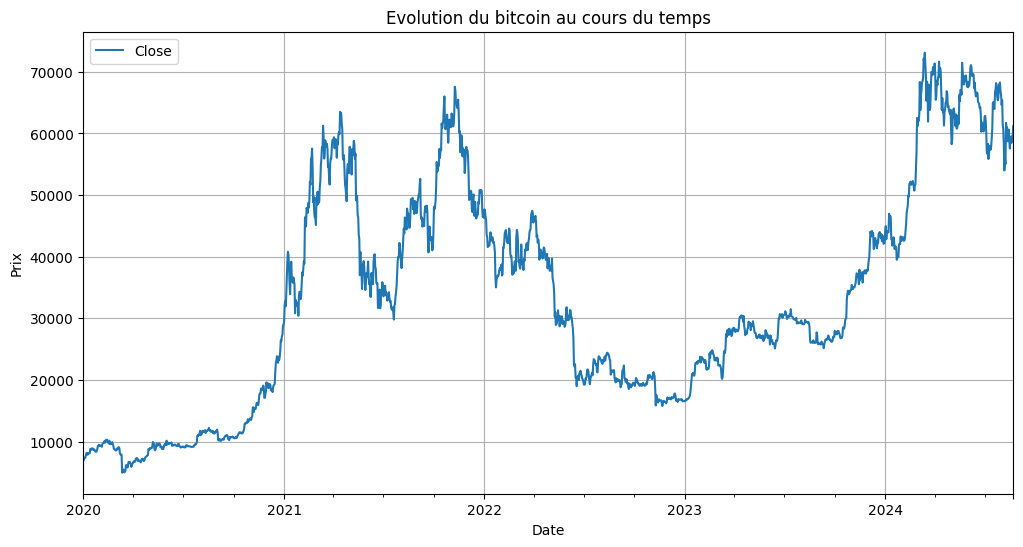

In [17]:
plt.figure(figsize=(12, 6))
data['Close'].plot()
plt.xlabel('Date')
plt.ylabel('Prix')
plt.title('Evolution du bitcoin au cours du temps')
plt.legend()
plt.grid(True)
plt.show()

**Décomposition multiplicative de la série temporelle**

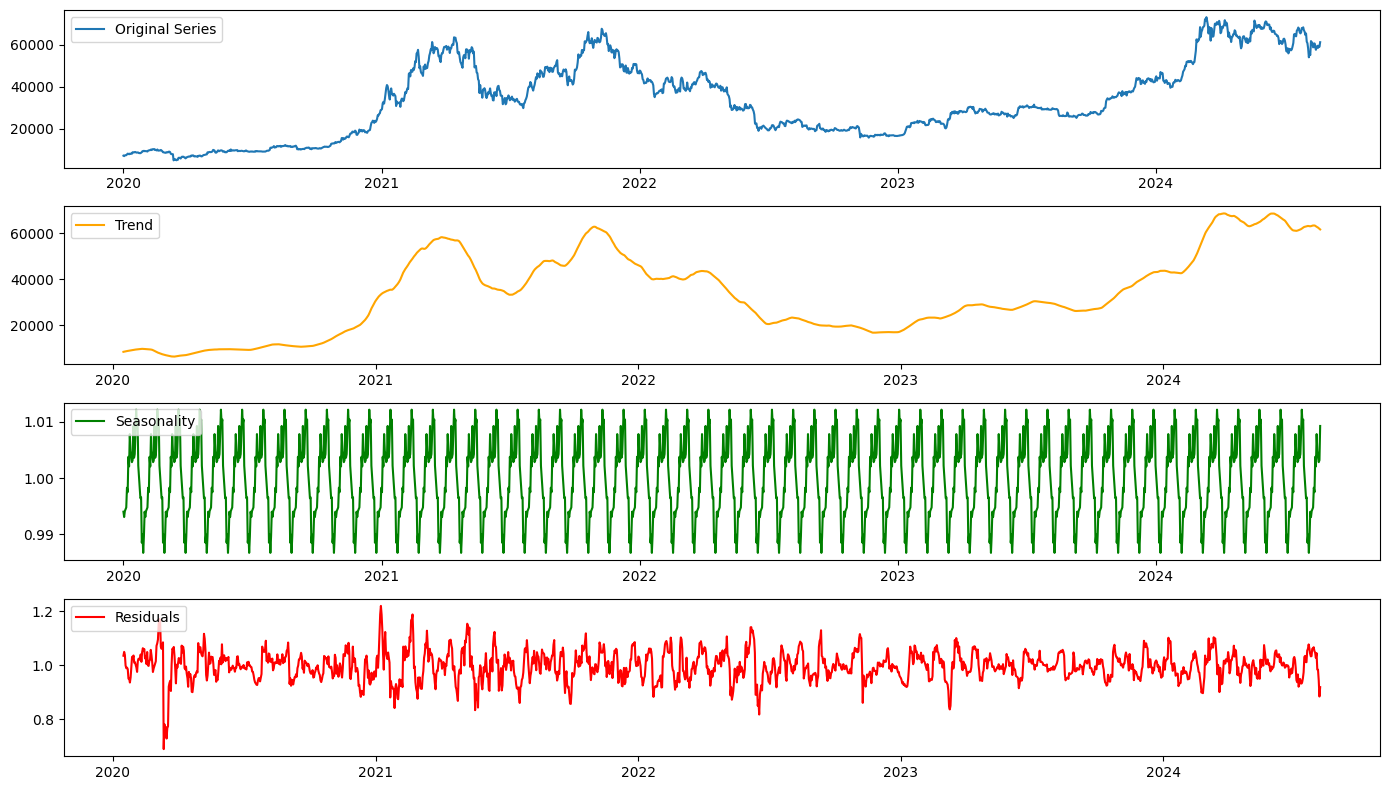

In [18]:

# Effectuons  la décomposition de la série temporelle

decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=30)

# Extraction des composants

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualisation

plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(data['Close'], label='Original Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Faites la décomposition additive** 

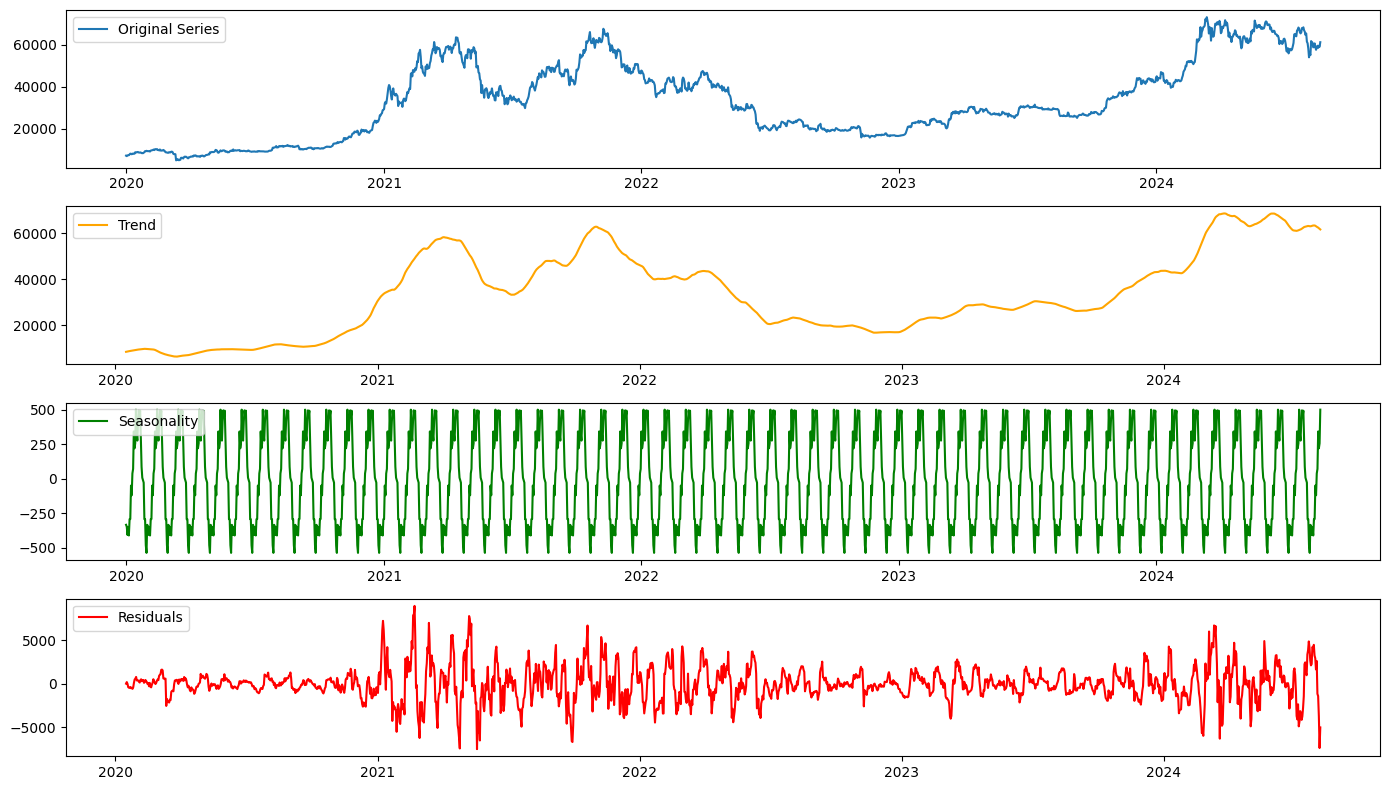

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ici on décompose la série temporelle

decomposition = seasonal_decompose(data['Close'], model='additive', period=30)

# Extraction des composants

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualisation

plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(data['Close'], label='Original Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Tendance

La tendance montre une forte montée jusqu'à 2021, suivie d'une baisse et d'une période de stabilité autour de 2022.
Une nouvelle montée commence à partir de 2023.
Cette tendance est cohérente avec l'observation visuelle de la série originale, confirmant que le comportement général de la série est influencé par des cycles d'expansion et de contraction.
 
 Saisonnalité

 On observe un motif régulier, avec des cycles de hausse et de baisse constants sur une période relativement courte, ce qui pourrait correspondre à des fluctuations  mensuelles ou autres dans les données.
La saisonnalité est stable au fil du temps, ce qui indique que les mêmes forces saisonnières sont en jeu tout au long de la période.
Cela pourrait représenter des influences prévisibles des fluctuations du bitcoin

Résidu

Les résidus représentent la partie de la série temporelle qui ne peut pas être expliquée par la tendance ou la saisonnalité. Ils capturent donc les fluctuations imprévisibles, qui peuvent être le résultat de chocs externes, d'événements spéciaux, ou d'autres facteurs aléatoires.
Dans notre cas, les résidus montrent des variations importantes, allant de 5000 à -5000. Cela signifie que, à certains moments, il y a eu des déviations significatives par rapport à ce qui était attendu d'après la tendance et la saisonnalité.

**Intéprétation des résultats**

**Explication des valeurs manquantes Nan sur les composantes**

**Comparaison des décomposition**

Décomposition Additive : Utilisée lorsque les variations saisonnières et irrégulières sont constantes en amplitude et ne dépendent pas du niveau de la tendance. La relation entre les composantes est additive : 

Décomposition Multiplicative : Utilisée lorsque les variations saisonnières et irrégulières varient proportionnellement au niveau de la tendance. La relation entre les composantes est multiplicative.

In [20]:
trend

Date
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
2020-01-05   NaN
              ..
2024-08-17   NaN
2024-08-18   NaN
2024-08-19   NaN
2024-08-20   NaN
2024-08-21   NaN
Name: trend, Length: 1695, dtype: float64

In [21]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

il est normal d'obtenir des valeurs NaN dans la composante de tendance (trend) lors de la décomposition d'une série temporelle, en particulier aux extrémités de la série. Cela se produit parce que certains algorithmes de décomposition, comme la décomposition additive ou multiplicative (via la méthode de la moyenne mobile ou STL), utilisent des fenêtres mobiles pour estimer la tendance. Aux bords de la série, il n'y a pas suffisamment de données pour calculer une tendance précise, ce qui entraîne des valeurs NaN